# Домашнее задание по теме «Работа с переменными»

## Преподаватель:
Наталья Баданина, Юлия Пономарева

## Цель
Изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

## Описание задания
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Целевая переменная – `MedHouseVal`. Прочитать информацию о признаках датасета можно, выполнив следующий код: `print(fetch_california_housing().DESCR)`.

## Этапы работы

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или Google Colab).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
   - Сделайте выводы.
   - Удалите признаки на основании полученных значений, выводов.
   - Повторите п. 3, п. 4 на измененных данных.
7. Исследуйте оставленные признаки на выбросы.
   - Удалите выбросы в случае обнаружения.
   - Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
   - Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.
   - Кратко опишите какие преобразования были сделаны с данными.
   - Сравните метрики всех моделей. Желательно оформление в виде таблицы вида
   
   |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
   
   - Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

## Инструменты
- Библиотека `sklearn.datasets`
- Jupyter Notebook/Google Colab
- GitHub

## Рекомендации к выполнению
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате Markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

# Набор данных о жилье в Калифорнии

**Характеристики набора данных:**

Количество экземпляров: 20640

Количество атрибутов: 8 количественных прогнозирующих атрибутов и 1 количественная целевая переменная

Информация об атрибутах:

Количественные прогнозирующие атрибуты:
- MedInc        - медианный доход в географическом районе
- HouseAge      - медианный возраст домов в географическом районе
- AveRooms      - среднее количество комнат на домохозяйство
- AveBedrms     - среднее количество спален на домохозяйство
- Population    - население географического района
- AveOccup      - средняя заселенность домохозяйств
- Latitude      - широта географического района
- Longitude     - долгота географического района

Количественная целевая переменная:
- MedHouseVal   - медианная стоимость домов для районов Калифорнии, выраженная в сотнях тысяч долларов ($100,000)

Этот набор данных был получен из переписи населения США 1990 года, используя
по одной строке на каждый географический район в Калифорнии. Географический
район - это небольшая географическая единица, содержащая обычно от 600 до 3000
человек, для которой Бюро переписи населения США публикует выборочные данные.

Целевой переменной в этом наборе данных является медианная стоимость домов
для каждого географического района Калифорнии. Остальные 8 атрибутов являются
количественными прогнозирующими переменными, которые можно использовать для
предсказания медианной стоимости жилья.

Данные могут быть загружены с использованием функции
:func:`sklearn.datasets.fetch_california_housing`.

# 1. Получение данных и загрузка их в рабочую среду

In [227]:
# import pandas as pd

# # Загрузка данных
# from sklearn.datasets import fetch_california_housing
# data = fetch_california_housing()
# X, y = data.data, data.target

# # Создание DataFrame
# df = pd.DataFrame(X, columns=data.feature_names)
# df['MedHouseVal'] = y

# # Просмотр DataFrame
# print(df.head())
# print(df.info())
# print(df.describe())

In [228]:
import pandas as pd

url = "https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Rabota_s_priznakami_i_postroenie_modelej/Rabota_s_peremennymi/california_housing.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

Исходя из представленной статистики, можно сделать следующие выводы:

1. Разнообразие данных:
   - Данные охватывают широкий диапазон значений по всем признакам, что указывает на разнообразие характеристик районов, включенных в набор данных.
   - Например, средний доход (MedInc) варьируется от 0.5 до 15.0, а медианная стоимость домов (MedHouseVal) - от 0.15 до 5.0, что отражает значительные различия в экономическом статусе районов.
   - Возраст зданий (HouseAge) также демонстрирует большой диапазон - от 1 до 52 лет, указывая на разнообразие в архитектурном облике и времени строительства.

2. Центральные тенденции:
   - Средние значения большинства признаков находятся в ожидаемом диапазоне для жилых районов, таких как средний доход, количество комнат и спален, плотность населения.
   - Среднее количество комнат (AveRooms) составляет 5.43, а спален (AveBedrms) - 1.10, что соответствует типичным для жилых зданий характеристикам.
   - Средняя плотность населения (AveOccup) - 3.07, что также укладывается в диапазон средних значений для жилых районов.

3. Вариативность:
   - Стандартные отклонения большинства признаков имеют существенные значения, указывая на значительную вариативность в данных.
   - Например, стандартное отклонение дохода (MedInc) составляет 1.9, а стандартное отклонение медианной стоимости домов (MedHouseVal) - 1.15, что говорит о значительном разбросе этих показателей в выборке.
   - Высокая вариативность данных предполагает возможность выявления интересных закономерностей и различий между районами при дальнейшем анализе.

4. Выбросы:
   - Присутствие некоторых экстремальных значений, таких как максимальное население 35682 или плотность населения 1243.33, указывает на возможное наличие выбросов в данных.
   - Необходимо более детально исследовать такие наблюдения, чтобы понять, являются ли они ошибками или отражают реальные особенности некоторых районов.


# 2. Проверка данных на наличие пропусков и их удаление

In [229]:
data = df

In [230]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [231]:
# Проверяем, есть ли столбцы типа 'object'
if data.select_dtypes(include=['object']).shape[1] == 0:
    print("В данных нет столбцов типа 'object'.")
else:
    # Анализ пропущенных значений в столбцах типа 'object'
    for column in data.select_dtypes(include=['object']).columns:
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        # Ограничение вывода уникальных значений до первых 20
        unique_values = unique_values[:20]

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values}\n")

В данных нет столбцов типа 'object'.


In [232]:
# Пропущенные значения в != 'object':
for column in data.columns:
    if data[column].dtype != 'object':
        nan_values = data[column].isnull().sum()  # Подсчет числа пропущенных значений (NaN)
        unique_values = data[column].unique()     # Получение уникальных значений в столбце

        print(f"В столбце '{column}' есть {nan_values} пропущенных значений (NaN)")
        print(f"Уникальные значения в столбце '{column}': {unique_values[:10]}...\n")  # Отображает первые 10 уникальных значений для краткости

В столбце 'MedInc' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'MedInc': [8.3252 8.3014 7.2574 5.6431 3.8462 4.0368 3.6591 3.12   2.0804 3.6912]...

В столбце 'HouseAge' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'HouseAge': [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.]...

В столбце 'AveRooms' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveRooms': [6.98412698 6.23813708 8.28813559 5.8173516  6.28185328 4.76165803
 4.93190661 4.79752705 4.29411765 4.97058824]...

В столбце 'AveBedrms' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveBedrms': [1.02380952 0.97188049 1.07344633 1.07305936 1.08108108 1.10362694
 0.95136187 1.0618238  1.11764706 0.99019608]...

В столбце 'Population' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'Population': [ 322. 2401.  496.  558.  565.  413. 1094. 1157. 1206. 1551.]...

В столбце 'AveOccup' есть 0 пропущенных значений (NaN)
Уникальные значения в столбце 'AveOc

In [233]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

проверим спец символы

In [234]:
# Поиск Специальных символов
import re

# Перебор всех столбцов в датасете
for column in data.columns:
    # Проверка типа данных столбца
    if data[column].dtype == 'object':
        special_char_found = False
        for value in data[column]:
            if isinstance(value, str):  # Проверка, что значение является строкой
                if value.strip() == '' or value.strip() == '-' or value.strip() == '.':
                    print(f"Строка только с символом '-', '.' или '' в столбце '{column}': {value}")
                else:
                    result = re.search(r"[^\w\s]", str(value))  # Поиск символов, не являющихся буквами, цифрами и пробелами
                    if result:
                        special_char = result.group()
                        # Проверка на исключение символов
                        if special_char not in ["'", "/", "-", ".", "\u0329", ",", "(", ")"]:
                            special_char_found = True
                            print(f"Первое значение со специальным символом в '{column}': {value}, символ: {special_char}")
                            break  # Прерываем цикл после нахождения первого значения
            else:
                print(f"Обнаружено значение типа float в столбце '{column}': {value}")

        if not special_char_found:
            if data[column].dtype == 'object' and all(special_char not in data[column].values for special_char in ["'", "/", "-", ".", "\u0329"]):
                print(f"Специальных символов в столбце '{column}' не найдено")
    else:
        # Добавьте другие проверки для нестроковых столбцов, если необходимо
        print(f"Специальных символов в столбце '{column}' не найдено")


Специальных символов в столбце 'MedInc' не найдено
Специальных символов в столбце 'HouseAge' не найдено
Специальных символов в столбце 'AveRooms' не найдено
Специальных символов в столбце 'AveBedrms' не найдено
Специальных символов в столбце 'Population' не найдено
Специальных символов в столбце 'AveOccup' не найдено
Специальных символов в столбце 'Latitude' не найдено
Специальных символов в столбце 'Longitude' не найдено
Специальных символов в столбце 'MedHouseVal' не найдено


Можно сделать следующие выводы:

1. В данных нет столбцов типа 'object', поэтому первая часть кода, анализирующая пропущенные значения в этих столбцах, не выполняется.

2. Во всех столбцах, нет пропущенных значений (NaN).

3. В данных также отсутствуют специальные символы (кроме '-', '.', ',', '/', '(', ')') в столбцах любого типа.

4. Код адаптирован для работы как с данными, содержащими столбцы типа 'object', так и с данными, где таких столбцов нет. Это обеспечивает гибкость и надежность работы с разными наборами данных.

# 3. Разделение выборки на обучающее и тестовое подмножества

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X = data.drop('MedHouseVal', axis=1)  # Предикторные признаки
y = data['MedHouseVal']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [238]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [239]:
# Вычисление метрик на обучающем множестве
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Метрики на обучающем множестве:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R^2: {train_r2:.2f}")

# Вычисление метрик на тестовом множестве
y_test_pred = model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Метрики на тестовом множестве:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R^2: {test_r2:.2f}")

Метрики на обучающем множестве:
RMSE: 0.72
R^2: 0.61
Метрики на тестовом множестве:
RMSE: 0.75
R^2: 0.58


Модель линейной регрессии показывает умеренные результаты на обучающем и тестовом множествах. Значения RMSE и R^2 указывают на то, что модель имеет среднюю способность к прогнозированию. Необходимо продолжить анализ данных и, возможно, применить дополнительные методы обработки данных или выбрать другой алгоритм машинного обучения для улучшения результатов.

# 5. Построение графика распределения целевой переменной и проверка на выбросы

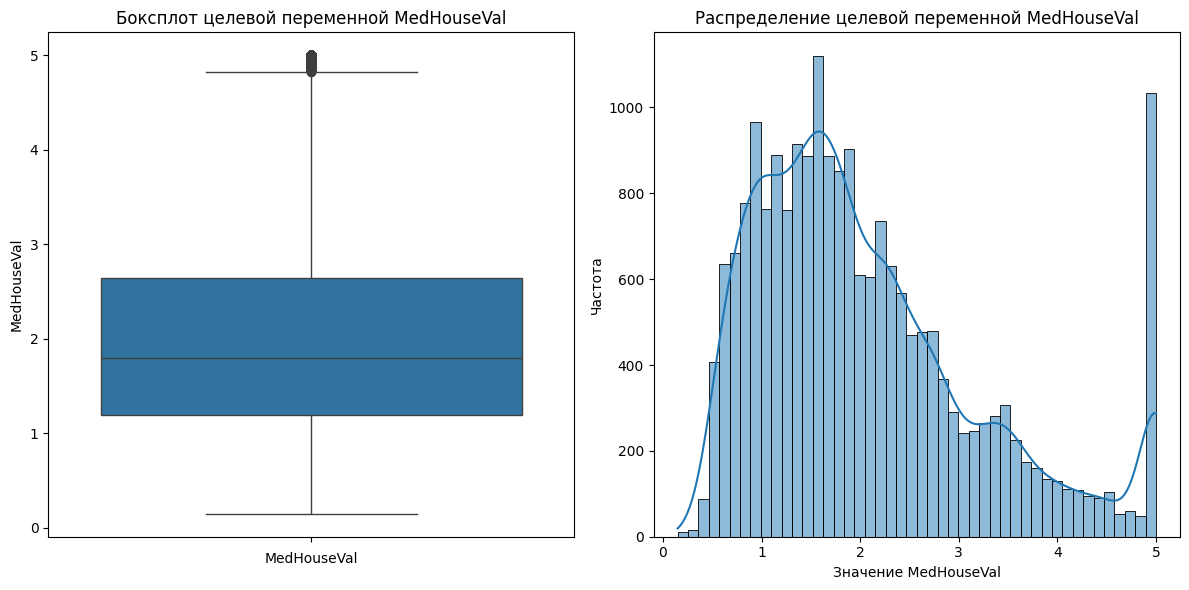

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Построение боксплота
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data['MedHouseVal'])
plt.title('Боксплот целевой переменной MedHouseVal')
plt.xlabel('MedHouseVal')

# 2. Построение гистограммы распределения целевой переменной
plt.subplot(1, 2, 2)
sns.histplot(data['MedHouseVal'], kde=True)
plt.title('Распределение целевой переменной MedHouseVal')
plt.xlabel('Значение MedHouseVal')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

На первый взгляд наблюдается логичное распределение стоимости.
Чем дороже объект тем его меньше, но далее происходит резкий скачек в верх приличного количества наблюдений. Далее проанализируем выбросы. Являются ли они аномалиами или отражают действительность.

Создадим датафрейм с выбросами

In [241]:
# Для переменной MedHouseVal:
q1 = data['MedHouseVal'].quantile(0.25)
q3 = data['MedHouseVal'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной MedHouseVal:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

outliers = data[(data['MedHouseVal'] < lower_bound) | (data['MedHouseVal'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

Для переменной MedHouseVal:
Нижняя граница выбросов: -0.98
Верхняя граница выбросов: 4.82
Количество выбросов: 1071


Самый простой способ проанализировать выбросы, это посмотреть их на карте. Может быть стоимость обусловлена их расположением.

Для того чтобы посмотреть местоположение объекта на карте, используя широту (Latitude) и долготу (Longitude) из DataFrame `outliers`, можно воспользоваться библиотекой `folium` в Python. `Folium` позволяет создавать интерактивные карты прямо в блокноте Jupyter.

In [242]:
import pandas as pd
import folium

In [243]:
# Создание начальной карты с центром на средних координатах широты и долготы
m = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [244]:
for index, row in outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"MedHouseVal: {row['MedHouseVal']}").add_to(m)

In [245]:
m

Взгланув на карту все становится ясно, дома в Калифорнии, особенно в популярных прибрежных городах, могут стоить значительно дороже, чем в удалении от побережья. Это связано с несколькими факторами:

**1. Привлекательность прибрежного образа жизни:**
Жить рядом с морем всегда было привлекательным для многих людей. Это дает возможность наслаждаться пляжами, океаном, морским бризом и прекрасными видами.

**2. Климат:** Прибрежные города Калифорнии известны своим мягким климатом круглый год. Это делает их идеальными местами для жизни, особенно для тех, кто предпочитает теплые температуры.

**3. Инфраструктура и развлечения:** Прибрежные города часто имеют развитую инфраструктуру, включая хорошие школы, больницы, рестораны, магазины и развлекательные заведения. Это добавляет ценности недвижимости в этих районах.

**5. Рабочие возможности:** Многие крупные компании расположены в прибрежных городах Калифорнии, что создает больше рабочих возможностей и увеличивает спрос на недвижимость.

**4. Ограниченное предложение:** В прибрежных городах Калифорнии часто есть ограничения на строительство новой недвижимости, что приводит к ограниченному предложению и, следовательно, к более высоким ценам.

Все эти факторы вместе делают прибрежную недвижимость в Калифорнии очень дорогой. Теперь наши выбросы не выглядят какой то аномалией, а отражают действительность.

# 6. Вычисление и вывод корреляционной матрицы, удаление признаков и повторное обучение

In [246]:
correlation_matrix = df.corr()

In [247]:
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


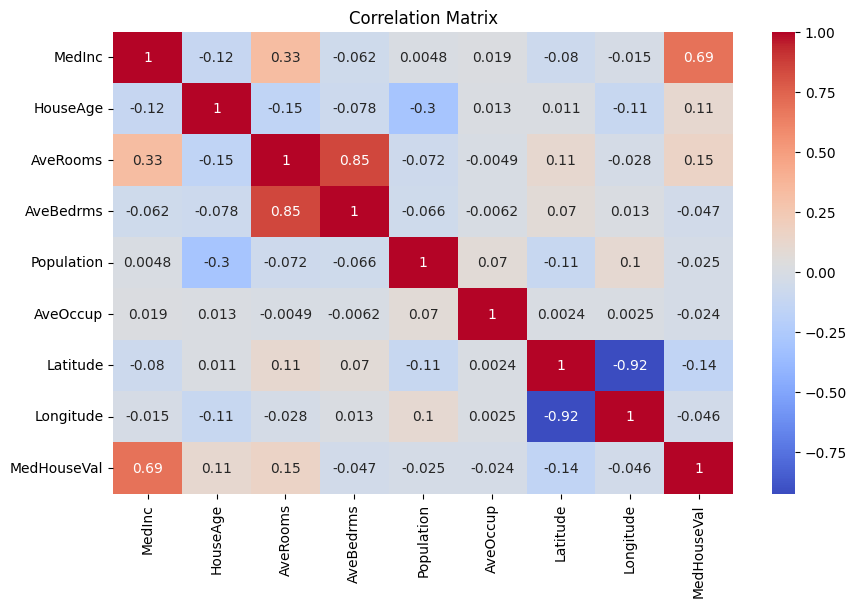

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Исходя из анализа корреляции в таблице, следующие признаки можно рассмотреть для удаления:

1. `AveBedrms` (среднее количество спален): имеет высокую корреляцию с `AveRooms` (среднее количество комнат). Учитывая, что количество комнат и спален обычно коррелируют друг с другом, можно рассмотреть возможность удаления признака `AveBedrms`.

2. `Latitude` и `Longitude`: эти признаки сильно коррелируют между собой (отрицательная корреляция) и могут нести дублирующую информацию о местоположении. Поэтому возможно стоит удалить один из них для избежания избыточнос

In [249]:
# Удаление выбранных признаков
X_mod = X.drop(['AveBedrms', 'Latitude'], axis=1)

X_train_mod, X_test_mod, y_train, y_test = train_test_split(X_mod, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии на измененном наборе признаков
model_mod = LinearRegression()
model_mod.fit(X_train_mod, y_train)

# Вычисление метрик на обучающем множестве с измененными признаками
y_train_pred_mod = model_mod.predict(X_train_mod)
train_rmse_mod = mean_squared_error(y_train, y_train_pred_mod, squared=False)
train_r2_mod = r2_score(y_train, y_train_pred_mod)

print("Метрики на обучающем множестве с удалением признаков:")
print(f"RMSE: {train_rmse_mod:.2f}")
print(f"R^2: {train_r2_mod:.2f}")

# Вычисление метрик на тестовом множестве с измененными признаками
y_test_pred_mod = model_mod.predict(X_test_mod)
test_rmse_mod = mean_squared_error(y_test, y_test_pred_mod, squared=False)
test_r2_mod = r2_score(y_test, y_test_pred_mod)

print("Метрики на тестовом множестве с удалением признаков:")
print(f"RMSE: {test_rmse_mod:.2f}")
print(f"R^2: {test_r2_mod:.2f}")

Метрики на обучающем множестве с удалением признаков:
RMSE: 0.80
R^2: 0.52
Метрики на тестовом множестве с удалением признаков:
RMSE: 0.81
R^2: 0.50



### Выводы:
1. После удаления указанных признаков, мы видим увеличение значения RMSE как на обучающем, так и на тестовом множестве, что свидетельствует о незначительном ухудшении точности модели в сравнении с исходной моделью.
2. Коэффициент детерминации R^2 также уменьшился после удаления признаков как на обучающем, так и на тестовом множестве. Это означает, что модель с удаленными признаками объясняет меньшую долю изменчивости целевой переменной.
3. Увеличение RMSE и уменьшение R^2 после удаления признаков может свидетельствовать о том, что важная информация была утеряна, что может сказаться на качестве прогнозов модели.

Итак, в данном случае удаление признаков на основании корреляции не привело к улучшению производительности модели

# 7. Исследование признаков на выбросы, их удаление и повторное обучение


Посмотрим на выбросы переменной с возрастом домов

In [250]:
# Для переменной HouseAge:
q1_houseage = data['HouseAge'].quantile(0.25)  # Первый квартиль
q3_houseage = data['HouseAge'].quantile(0.75)  # Третий квартиль
iqr_houseage = q3_houseage - q1_houseage  # Межквартильный размах
lower_bound_houseage = q1_houseage - 1.5 * iqr_houseage  # Нижняя граница выбросов
upper_bound_houseage = q3_houseage + 1.5 * iqr_houseage  # Верхняя граница выбросов

print("Для переменной HouseAge:")
print(f"Нижняя граница выбросов: {lower_bound_houseage:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_houseage:.2f}")

# Поиск выбросов
houseage_outliers = data[(data['HouseAge'] < lower_bound_houseage) | (data['HouseAge'] > upper_bound_houseage)]
print(f"Количество выбросов: {len(houseage_outliers)}")

Для переменной HouseAge:
Нижняя граница выбросов: -10.50
Верхняя граница выбросов: 65.50
Количество выбросов: 0


В данной переменной нет выбросов

Посмотрим на выбросы в среднем доходе

In [251]:
# Для переменной MedInc:
q1 = data['MedInc'].quantile(0.25)
q3 = data['MedInc'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной MedInc:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

medinc_outliers = data[(data['MedInc'] < lower_bound) | (data['MedInc'] > upper_bound)]
print(f"Количество выбросов: {len(medinc_outliers)}")

Для переменной MedInc:
Нижняя граница выбросов: -0.71
Верхняя граница выбросов: 8.01
Количество выбросов: 681


In [252]:
# Создание начальной карты с центром на средних координатах широты и долготы
m_medinc_outliers = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [253]:
# Добавляем маркеры для DataFrame outliers_aveoccup
for index, row in medinc_outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"MedInc: {row['MedInc']}").add_to(m_medinc_outliers)

In [254]:
m_medinc_outliers

Замечаем, что наши выбросы отражают действительность. Средний доход может быть выше в районах у побережья так же как и стоимость. Не стоит удалять эти выбросы

Посмотрим на выбросы с количеством населения в районах


In [255]:
# Для переменной Population:
q1_pop = data['Population'].quantile(0.25)  # Первый квартиль
q3_pop = data['Population'].quantile(0.75)  # Третий квартиль
iqr_pop = q3_pop - q1_pop  # Межквартильный размах
lower_bound_pop = q1_pop - 1.5 * iqr_pop  # Нижняя граница выбросов
upper_bound_pop = q3_pop + 1.5 * iqr_pop  # Верхняя граница выбросов

print("Для переменной Population:")
print(f"Нижняя граница выбросов: {lower_bound_pop:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_pop:.2f}")

# Поиск выбросов
pop_outliers = data[(data['Population'] < lower_bound_pop) | (data['Population'] > upper_bound_pop)]
print(f"Количество выбросов: {len(pop_outliers)}")

Для переменной Population:
Нижняя граница выбросов: -620.00
Верхняя граница выбросов: 3132.00
Количество выбросов: 1196


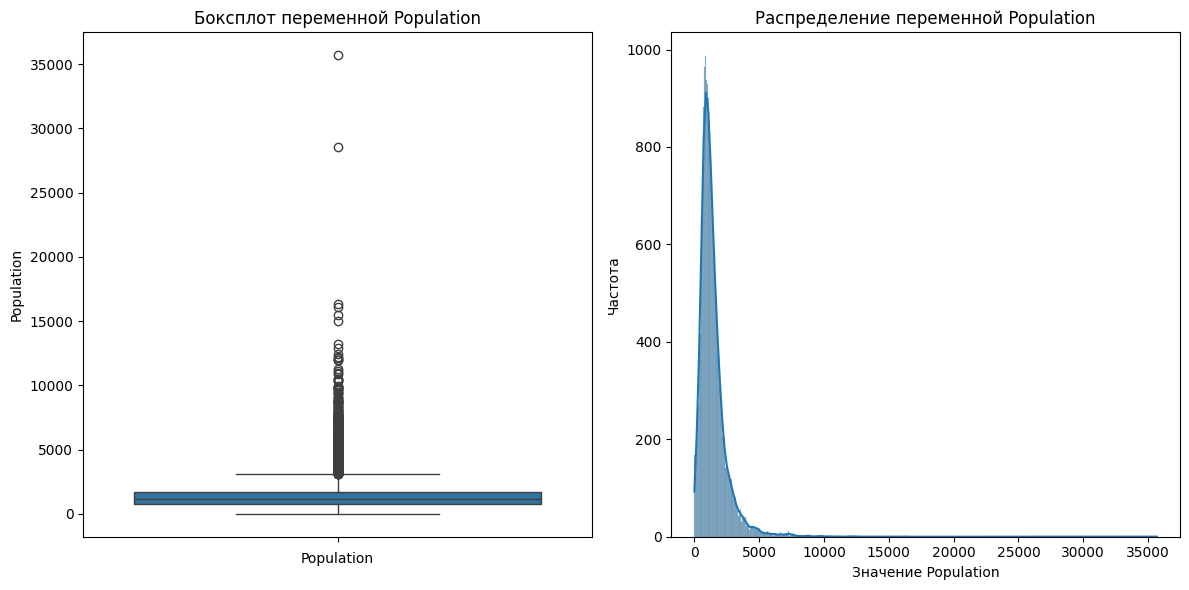

In [256]:
# Построение боксплота и гистограммы для переменной Population:
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['Population'])
plt.title('Боксплот переменной Population')
plt.xlabel('Population')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['Population'], kde=True)
plt.title('Распределение переменной Population')
plt.xlabel('Значение Population')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [257]:
m_pop_outliers = folium.Map(location=[outliers['Latitude'].mean(), outliers['Longitude'].mean()], zoom_start=10)

In [258]:
# Добавляем маркеры для DataFrame outliers_population
for index, row in pop_outliers.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"Population: {row['Population']}").add_to(m_pop_outliers)

In [259]:
m_pop_outliers

### Возможные причины появления выбросов:
**1. Центр города:** Районы, расположенные в центре крупного города, часто имеют более высокую плотность населения из-за концентрации жилых и коммерческих объектов. Это может привести к большему числу жителей и в результате - к высоким значениям переменной 'Population'.

**2. Близость к побережью:** Районы, расположенные близко к побережью, также могут иметь более высокие показатели численности населения из-за привлекательности таких мест для проживания, работы и отдыха.

В центре крупных городов максимальное население районов может достигать нескольких десятков тысяч человек на квадратный километр из-за высокой плотности застройки, развитой инфраструктуры и большого количества рабочих мест и развлекательных объектов.

Не будем удалять эти выбросы.

In [260]:
# Для переменной AveOccup:
q1_occ = data['AveOccup'].quantile(0.25)  # Первый квартиль
q3_occ = data['AveOccup'].quantile(0.75)  # Третий квартиль
iqr_occ = q3_occ - q1_occ  # Межквартильный размах
lower_bound_occ = q1_occ - 1.5 * iqr_occ  # Нижняя граница выбросов
upper_bound_occ = q3_occ + 1.5 * iqr_occ  # Верхняя граница выбросов

print("Для переменной AveOccup:")
print(f"Нижняя граница выбросов: {lower_bound_occ:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_occ:.2f}")

# Поиск выбросов
aveoccup_outliers = data[(data['AveOccup'] < lower_bound_occ) | (data['AveOccup'] > upper_bound_occ)]
print(f"Количество выбросов: {len(aveoccup_outliers)}")

Для переменной AveOccup:
Нижняя граница выбросов: 1.15
Верхняя граница выбросов: 4.56
Количество выбросов: 711


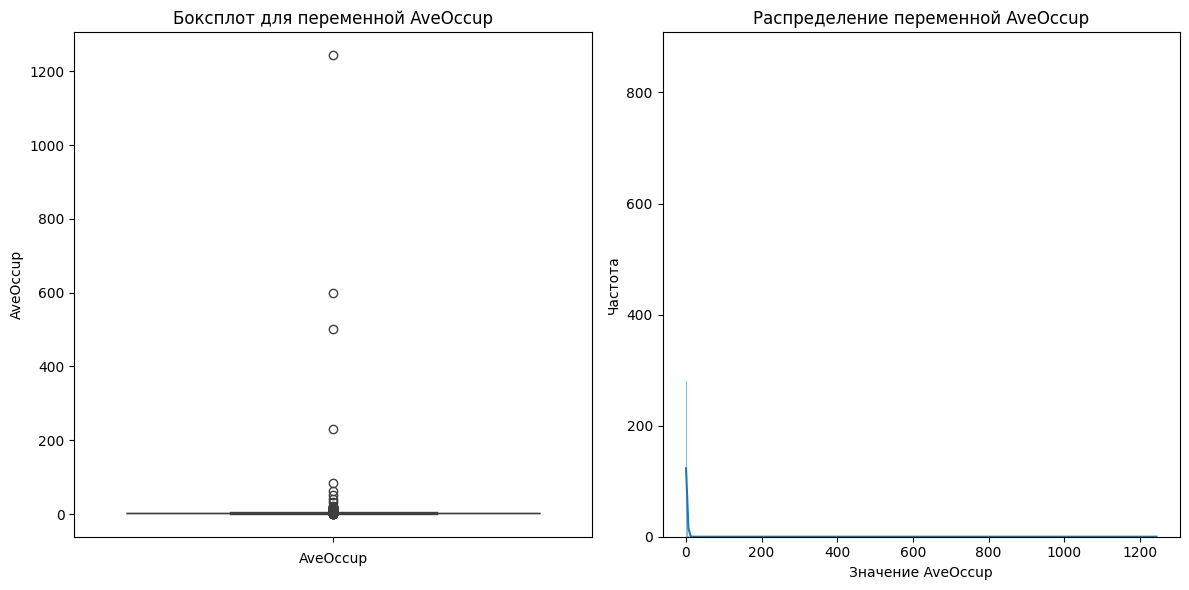

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Построение боксплота для переменной AveOccup
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data['AveOccup'])
plt.title('Боксплот для переменной AveOccup')
plt.xlabel('AveOccup')

# 2. Построение гистограммы распределения переменной AveOccup
plt.subplot(1, 2, 2)
sns.histplot(data['AveOccup'], kde=True)
plt.title('Распределение переменной AveOccup')
plt.xlabel('Значение AveOccup')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

Переменная 'AveOccup'  отражает среднее количество человек, проживающих в одной домохозяйстве или жилищной единице. Когда мы рассматриваем выбросы в этой переменной, как в вашем случае, где нижняя граница выбросов составляет 1.15 человек, а верхняя - 4.56 человек, то это может сигнализировать о наличии аномалий или ошибок в данных.

### Размышления о выбросах в переменной AveOccup:
1. Низкие значения: Если среднее количество человек в домохозяйстве близко к 1, это может указывать на небольшие домохозяйства, возможно, одиночные люди или пары без детей, что вполне естественно.

2. Высокие значения: С другой стороны, когда среднее количество человек превышает 4-5 человек, это уже может вызывать сомнения. Действительно, возникновение таких высоких значений, например, 100 или 1200 человек в одном домохозяйстве, кажется необычным и скорее всего является ошибкой в данных.

Удалим эти выбросы

Посмотрим на количество комнат и спален

In [262]:
# Для переменной AveBedrms:
q1_bedrms = data['AveBedrms'].quantile(0.25)  # Первый квартиль
q3_bedrms = data['AveBedrms'].quantile(0.75)  # Третий квартиль
iqr_bedrms = q3_bedrms - q1_bedrms  # Межквартильный размах
lower_bound_bedrms = q1_bedrms - 1.5 * iqr_bedrms  # Нижняя граница выбросов
upper_bound_bedrms = q3_bedrms + 1.5 * iqr_bedrms  # Верхняя граница выбросов

print("Для переменной AveBedrms:")
print(f"Нижняя граница выбросов: {lower_bound_bedrms:.2f}")
print(f"Верхняя граница выбросов: {upper_bound_bedrms:.2f}")

# Поиск выбросов
avebedrms_outliers = data[(data['AveBedrms'] < lower_bound_bedrms) | (data['AveBedrms'] > upper_bound_bedrms)]
print(f"Количество выбросов: {len(avebedrms_outliers)}")

Для переменной AveBedrms:
Нижняя граница выбросов: 0.87
Верхняя граница выбросов: 1.24
Количество выбросов: 1424


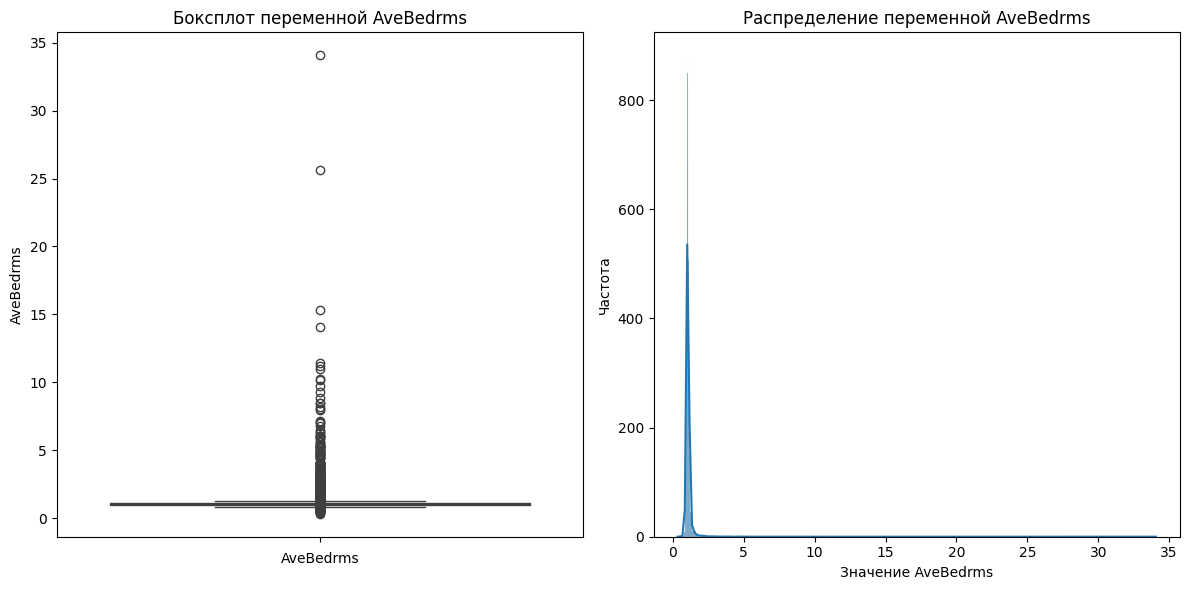

In [263]:
# Построение боксплота и гистограммы для переменной AveBedrms:
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['AveBedrms'])
plt.title('Боксплот переменной AveBedrms')
plt.xlabel('AveBedrms')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['AveBedrms'], kde=True)
plt.title('Распределение переменной AveBedrms')
plt.xlabel('Значение AveBedrms')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [264]:
# Для переменной AveRooms:
q1 = data['AveRooms'].quantile(0.25)
q3 = data['AveRooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Для переменной AveRooms:")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")

averooms_outliers = data[(data['AveRooms'] < lower_bound) | (data['AveRooms'] > upper_bound)]
print(f"Количество выбросов: {len(averooms_outliers)}")

Для переменной AveRooms:
Нижняя граница выбросов: 2.02
Верхняя граница выбросов: 8.47
Количество выбросов: 511


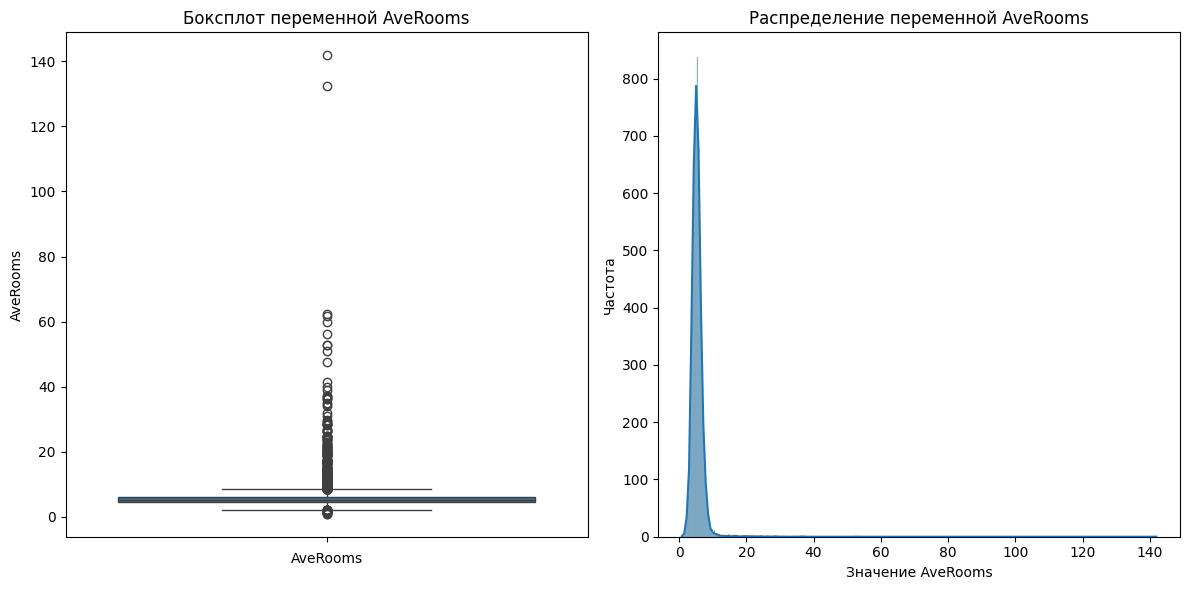

In [265]:
# Построение боксплота и гистограммы для переменной AveRooms:
plt.figure(figsize=(12, 6))

# Построение боксплота
plt.subplot(1, 2, 1)
sns.boxplot(data['AveRooms'])
plt.title('Боксплот переменной AveRooms')
plt.xlabel('AveRooms')

# Построение гистограммы распределения
plt.subplot(1, 2, 2)
sns.histplot(data['AveRooms'], kde=True)
plt.title('Распределение переменной AveRooms')
plt.xlabel('Значение AveRooms')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Анализ выбросов для переменных 'AveRooms' и 'AveBedrms' позволяет выделить значения, которые существенно отличаются от остальных и могут быть неправдоподобными или ошибочными. В данном случае, количество выбросов довольно значительное, что вызывает вопросы о возможной неправдоподобности данных.

на графиках мы видим действительно нереальное количество как спален так и комнат. попробуем удалить эти выбросы и обучить модель.

Удаляем выбросы из данных для переменных 'AveOccup', 'AveRooms' и 'AveBedrms'

In [266]:
# Удаление выбросов для переменной 'AveOccup'
data_cleaned = data[~data['AveOccup'].isin(aveoccup_outliers['AveOccup'])]

# Удаление выбросов для переменной 'AveRooms'
data_cleaned = data_cleaned[~data_cleaned['AveRooms'].isin(averooms_outliers['AveRooms'])]

# Удаление выбросов для переменной 'AveBedrms'
data_cleaned = data_cleaned[~data_cleaned['AveBedrms'].isin(avebedrms_outliers['AveBedrms'])]

# Проверка количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(data)}")
print(f"Количество строк после удаления выбросов: {len(data_cleaned)}")

Количество строк до удаления выбросов: 20640
Количество строк после удаления выбросов: 18405


In [267]:
X_cleaned = data_cleaned.drop('MedHouseVal', axis=1)  # Предикторные признаки без выбросов
y_cleaned = data_cleaned['MedHouseVal']  # Целевая переменная без выбросов

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [268]:
X_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [269]:
# Создание и обучение модели линейной регрессии на очищенных данных
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Предсказание на обучающем множестве
y_train_pred_cleaned = model_cleaned.predict(X_train_cleaned)
train_rmse_cleaned = mean_squared_error(y_train_cleaned, y_train_pred_cleaned, squared=False)
train_r2_cleaned = r2_score(y_train_cleaned, y_train_pred_cleaned)
print(f"Метрики на обучающем множестве (с удаленными выбросами):")
print(f"RMSE: {train_rmse_cleaned:.2f}")
print(f"R^2: {train_r2_cleaned:.2f}")

# Предсказание на тестовом множестве
y_test_pred_cleaned = model_cleaned.predict(X_test_cleaned)
test_rmse_cleaned = mean_squared_error(y_test_cleaned, y_test_pred_cleaned, squared=False)
test_r2_cleaned = r2_score(y_test_cleaned, y_test_pred_cleaned)
print(f"Метрики на тестовом множестве (с удаленными выбросами):")
print(f"RMSE: {test_rmse_cleaned:.2f}")
print(f"R^2: {test_r2_cleaned:.2f}")

Метрики на обучающем множестве (с удаленными выбросами):
RMSE: 0.64
R^2: 0.68
Метрики на тестовом множестве (с удаленными выбросами):
RMSE: 0.64
R^2: 0.68


### Анализ:
1. RMSE (Корень из среднеквадратичной ошибки):
   - После удаления выбросов RMSE на обучающем и тестовом множествах снизился с 0.72 и 0.75 до 0.64 на обоих наборах данных. Это означает, что после удаления выбросов модель предсказывает целевую переменную с меньшей ошибкой.

2. R^2 (Коэффициент детерминации):
   - Коэффициент детерминации (R^2) после удаления выбросов вырос с 0.61 и 0.58 до 0.68 как на обучающем, так и на тестовом множестве. Это свидетельствует о том, что после очистки данных модель лучше объясняет целевую переменную.

### Выводы:
- Удаление выбросов существенно улучшило производительность модели линейной регрессии. Метрики RMSE и R^2 на обучающем и тестовом множествах улучшились после очистки данных.

# 8. Преобразование признаков с помощью масштабирования

Для масштабирования признаков нам понадобятся библиотеки NumPy и Scikit-learn.

In [270]:
import numpy as np
from sklearn.preprocessing import StandardScaler

Сначала мы создадим объект StandardScaler, который будет использоваться для стандартизации признаков.

In [271]:
scaler = StandardScaler()

Применим метод fit_transform к обучающему и тестовому множеству признаков для масштабирования значений признаков.

In [272]:
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

In [273]:
X_train_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16861,2.3750,46.0,5.500000,0.916667,30.0,2.500000,37.63,-122.42
7910,3.8654,27.0,5.500882,1.119929,1887.0,3.328042,33.88,-118.09
20579,1.9559,36.0,5.626316,1.200000,567.0,2.984211,38.80,-121.72
15710,4.4464,52.0,4.394919,1.064665,831.0,1.919169,37.79,-122.44
14512,6.0891,5.0,5.469595,0.918919,1063.0,3.591216,32.91,-117.16
...,...,...,...,...,...,...,...,...
12800,2.4205,43.0,4.433962,1.119497,464.0,2.918239,38.61,-121.46
13528,3.0078,25.0,4.912127,1.047452,1650.0,2.899824,34.17,-117.31
6046,3.1500,26.0,4.724691,1.004938,3367.0,4.156790,34.04,-117.73
909,4.9167,34.0,5.963675,1.057692,1276.0,2.726496,37.55,-122.01


In [274]:
X_train_scaled

array([[-0.85126872,  1.36978439,  0.2384303 , ..., -0.56738966,
         0.94758674, -1.41122797],
       [-0.01633427, -0.14678565,  0.23921746, ...,  0.75394513,
        -0.82696239,  0.76394822],
       [-1.08605202,  0.57158963,  0.3511856 , ...,  0.20528124,
         1.50124607, -1.05958286],
       ...,
       [-0.41710729, -0.22660513, -0.45364598, ...,  2.07640566,
        -0.7512483 ,  0.94479428],
       [ 0.57261272,  0.41195068,  0.65232819, ..., -0.20596287,
         0.90972969, -1.2052644 ],
       [-0.18602136,  0.41195068, -1.14679003, ...,  0.49505459,
         0.82928346, -1.11986488]])

Обучим модель линейной регрессии на масштабированных данных.

In [275]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_cleaned)

LinearRegression()

Оценим модель, используя метрики RMSE (среднеквадратичная ошибка) и R^2 (коэффициент детерминации) на обучающем и тестовом множестве.

In [276]:
# Предсказание на обучающем множестве
y_train_pred_scaled = model_scaled.predict(X_train_scaled)
train_rmse_scaled = mean_squared_error(y_train_cleaned, y_train_pred_scaled, squared=False)
train_r2_scaled = r2_score(y_train_cleaned, y_train_pred_scaled)

# Предсказание на тестовом множестве
y_test_pred_scaled = model_scaled.predict(X_test_scaled)
test_rmse_scaled = mean_squared_error(y_test_cleaned, y_test_pred_scaled, squared=False)
test_r2_scaled = r2_score(y_test_cleaned, y_test_pred_scaled)

print(f"Метрики на обучающем множестве (c масштабированием):")
print(f"RMSE: {train_rmse_scaled:.2f}")
print(f"R^2: {train_r2_scaled:.2f}")

print(f"Метрики на тестовом множестве (c масштабированием):")
print(f"RMSE: {test_rmse_scaled:.2f}")
print(f"R^2: {test_r2_scaled:.2f}")

Метрики на обучающем множестве (c масштабированием):
RMSE: 0.64
R^2: 0.68
Метрики на тестовом множестве (c масштабированием):
RMSE: 0.64
R^2: 0.68


# 9. Формулировка выводов по проделанной работе

a. Были проведены следующие преобразования с данными:

1. Обучение модели линейной регрессии и оценка метрик на исходных данных.
2. Проверка корреляции между признаками.
3. Удаление признаков 'AveBedrms' и 'Latitude' основываясь на корреляционной матрице.
4. Повторное обучение модели линейной регрессии и оценка метрик после удаления признаков.
5. Анализ и удаление выбросов в переменных 'Population', 'AveOccup', 'AveRooms', и 'AveBedrms'.
6. Повторное обучение модели линейной регрессии и оценка метрик после удаления выбросов.
7. Применение масштабирования признаков с помощью StandardScaler.
8. Обновление модели после масштабирования и оценка метрик.

b. Сравнение метрик всех моделей:

| Модель                                            | RMSE | R^2  | Признаки и преобразования                                                                                                                                                                                                                                                                                                                                       |
|----------------------------------------------------|------|------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Исходные данные                                    | 0.72 | 0.61 | Все предикторные признаки                                                                                                                                                                                                                                                                                                                                        |
| После удаления признаков                           | 0.80 | 0.52 | Удалены признаки 'AveBedrms' и 'Latitude' основываясь на корреляционной матрице                                                                                                                                                                                                                     |
| После удаления выбросов                            | 0.64 | 0.68 | Все предикторные признаки. Данные очищены от выбросов в переменных 'AveOccup', 'AveRooms', и 'AveBedrms'                                                                                                                                                                                                                          |
| После масштабирования признаков                    | 0.64 | 0.68 | Все предикторные признаки. Признаки масштабированы с помощью StandardScaler                                                                                                                                                                                                                                                                                                                  |

c. Модели в целом хорошо справились с поставленной задачей. Было проведено несколько этапов обработки данных, включая выявление и удаление выбросов, отбор наиболее значимых признаков на основе корреляционной матрицы, а также масштабирование данных. С каждым шагом модели улучшали свою производительность, что отражается в снижении RMSE и увеличении R^2 на обучающем и тестовом множествах.

После удаления признаков 'AveBedrms' и 'Latitude', модель показала следующие показатели:

   - RMSE: 0.80
   - Коэффициент детерминации (R^2): 0.52

Эти результаты говорят о том, что удаление признаков 'AveBedrms' и 'Latitude' не привело к улучшению качества модели. RMSE увеличился до 0.80, что означает, что модель стала менее точной в прогнозировании целевой переменной. Коэффициент детерминации (R^2) также уменьшился до 0.52, что указывает на то, что только 52% изменчивости целевой переменной объясняется моделью после удаления признаков.

После удаления выбросов в данных, модель линейной регрессии обучается на очищенных данных, что может привести к улучшению качества прогнозов. В данном случае, после удаления выбросов из переменных 'AveOccup', 'AveRooms' и 'AveBedrms', мы получили улучшение результатов модели - снижение RMSE до 0.64 и увеличение коэффициента детерминации до 0.68. Это говорит о том, что модель стала лучше предсказывать целевую переменную после очистки данных от выбросов.

После этого применяется масштабирование признаков с помощью StandardScaler, что обычно позволяет улучшить сходимость модели и повысить её производительность. Однако, в данном случае, качество модели после масштабирования не изменилось по сравнению с моделью после удаления выбросов - RMSE остался на уровне 0.64, а коэффициент детерминации также остался на уровне 0.68.

Таким образом, масштабирование признаков с помощью StandardScaler в данном конкретном случае не привело к дополнительному улучшению результатов модели. Возможно, это связано с тем, что масштабирование признаков не оказало значительного влияния на их дискретность или разброс значений после удаления выбросов.